In [1]:
import numpy as np
import pylab as pl
%matplotlib inline

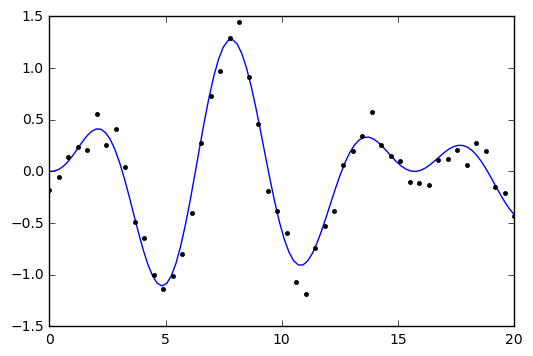

In [2]:
def f(x):
    '''
    Returns a sample with instances without noise.
    '''
    y = np.sin(x) * np.exp(-0.1*x) * np.sqrt(x) * np.sin(0.2*x)
    return (y)

def sample(x, f, noise):
    '''
    Returns a sample with 'size' instances.
    '''
    mn = np.min(f(x))
    mx = np.max(f(x))
    y = f(x) + pl.randn(x.size)*noise*(mx-mn)
    return (y)
    
pl.clf()
xmax = 20
x = np.linspace(0, xmax, 100)
y = f(x)
pl.plot(x, y)

xs = np.linspace(0, xmax, 50)
ys = sample(xs, f, .05)
pl.plot(xs, ys, 'k.')

In [4]:
from sklearn.linear_model import LinearRegression

def fit_polynomial(x, y, degree):
    '''
    Fits a polynomial to the input sample.
    (x,y): input sample
    degree: polynomial degree
    '''
    model = np.polyfit(x, y, degree)
    #model = LinearRegression()
    model.fit(np.vander(x, degree + 1), y)
    return model

def apply_polynomial(model, x):
    '''
    Evaluates a linear regression model in an input sample
    model: linear regression model
    x: input sample
    '''
    degree = model.coef_.size - 1
    y = model.predict(np.vander(x, degree + 1))
    return y

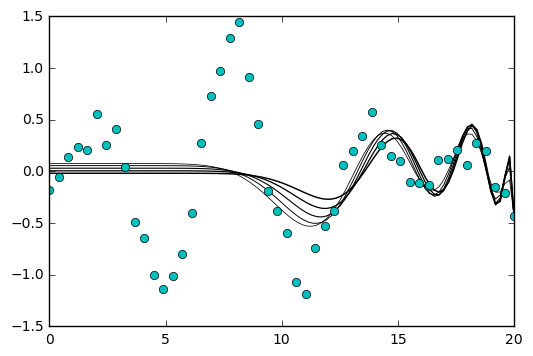

In [12]:
for i in range(20,25):
    model = fit_polynomial(xs, ys, i)
    p_y = apply_polynomial(model, x)
    lwd = 0.05 + float(i)/16*2 - 2
    pl.plot(x, p_y, 'k',lw=lwd)
pl.plot(xs, ys, "co")

In [7]:
range(10, 20)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

Object `sklearn.linear_model` not found.


In [10]:
LinearRegression?

/store/TeachJob/AstrometriaI/pythings/lib/python2.7/site-packages/ipykernel_launcher.py:4: RankWarning: The fit may be poorly conditioned
  after removing the cwd from sys.path.


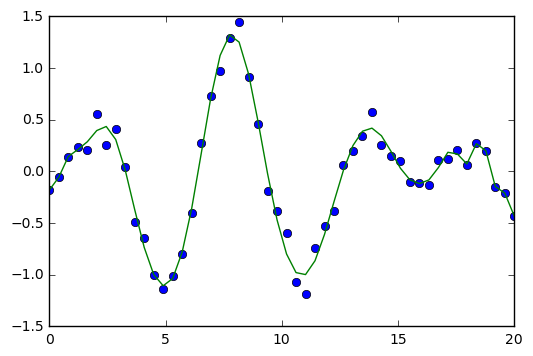

In [24]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

coefs = poly.polyfit(xs, ys, 59)
ffit = poly.polyval(xs, coefs)
plt.plot(xs,ys, "o")
plt.plot(xs, ffit)